# Week 05 Handson - Dimentionality Reduction
In this handson week, we will try to implement one of popular dimentionality reduction techniques, which is PCA (*Principal Component Analysis*). Along with the mathematical derivation explanation in the class, in this week handson, you are asked to implement that mathematical formula of PCA to a python function where the code template is provided below. Enjoy~

#### Read Digit MNIST to Array 2D
1. Code below is provided to read MNIST digit '0' and '1' where the final output is a matrix `original_data` (row is for the number of image being read, 200 images, and column is for image features, which is from image pixels = 784 pixels = 28 pixels $\times$ 28 pixels),
2. From 200 rows, the first 100 rows are digit of '0', and next 100 rows are digit of '1'.

In [3]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt
import os

# function to read MNIST digit to numpy array
def baca_image(folder_image):
    list_nama_image= os.listdir(folder_image)
    list_path_image = [os.path.join(folder_image, i) for i in list_nama_image]
    original_data = np.ndarray(shape=(0,28*28))
    for i in list_path_image:
        image = cv2.imread(i, 0)
        image_reshaped = image.reshape((1, -1))
        original_data = np.concatenate((original_data, image_reshaped), axis=0)
    return original_data
        
# use the fuction        
digit_0 = baca_image("digit_mnist/0")# adjust with your own path
digit_1 = baca_image("digit_mnist/1")# adjust with your own path

# concatenate digit of '0' and '1'
original_data = np.concatenate((digit_0, digit_1), axis=0)
print("original_data shape:", original_data.shape)

# label
label = np.full((200), 0); label[100:200] = 1
print("label shape:", label.shape)

original_data shape: (200, 784)
label shape: (200,)


## Milestone 01 (M01)
A template code is already provided below. In M01, you are asked to complete the `pca` function so that the `original_data` with 784 features will be reduced to **only 2 features with PCA**.

C:\Users\Dell Warna Biru\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\numeric.py:591: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


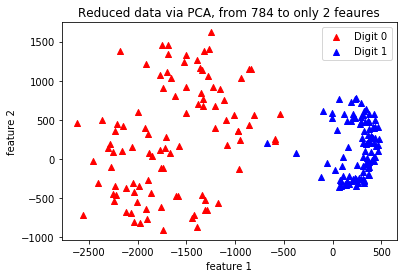

In [11]:
#create PCA function
def pca(input_ori, desired_dim):
    '''
    write code implementation of PCA here
    Hint: all the detailed steps are already explained in
          the lecture. You may take a look to "PCA_slide.pdf" (in the course portal)
    parameters:
    a. input_ori: "original_data" in the previous code block
    b. desired_dim: desired dimension = 2
    
    return values:
    a. W: projection matrix of PCA
    b. Y: projected/reduced data via PCA
    '''
    mean_ori = np.mean(input_ori, axis = 0) # or:  np.mean(input_ori.T, axis = 1) 
    mid_column = input_ori - mean_ori
    cov_mat = np.cov(mid_column.T) # covariance matrix: or -> np.matmul(mid_column.T, mid_column)
    
    eigen_val, eigen_vect= np.linalg.eig(cov_mat)
    
    W = eigen_vect.T[:desired_dim].T
    Y = np.matmul(input_ori, W)
    
#     W = np.full((1,1),1) # this is only a dummy data so that this
#                             # template code can be run without error
#     Y = np.full((200,2), 1) # another dummy data
    return W, Y 

# project the original data of MNIST digit with 784 pixels 
# (28 pixels x 28 pixels) to only two features / dimentions
projection_matrix, reduced_data = pca(input_ori=original_data,desired_dim=2)

#plotting
plt.scatter(reduced_data[0:100:,0], 
            reduced_data[0:100:,1],
            marker="^", c='red', label='Digit 0') #PCA plot for digit of '0'

plt.scatter(reduced_data[100:200:,0], 
            reduced_data[100:200:,1],
            marker="^", c='blue', label='Digit 1') #PCA plot for digit of '1'

plt.title("Reduced data via PCA, from 784 to only 2 feaures")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.legend()
plt.show()

#### Illustration of a successfully reduced data via PCA
<img src="ilustrasi_hasil_PCA.JPG" alt="" width="500"/>

To further understand the use of PCA, we will use the reduced data via PCA to a classifier. In this case, we will compare the accuracy when using: (i) `original_data` vs (ii) `reduced_data`.

## M02
Before feeding to classifier, we will split our data to training and testing data.<br>
a. Please split `original_data` using `StratifiedShuffleSplit` API of scikit-learn with `n_splits=1` and ratio of `70%:30%` for `training:testing data`. From this, we will have: (i) `training_input`, (ii) `training_label`, (iii) `testing_input` and (iv) `testing_label`.

In [12]:
# Write code for M02 here
from sklearn.model_selection import StratifiedShuffleSplit

def splitData(data, label, train_sz, test_sz):
    sss = StratifiedShuffleSplit(n_splits=1, train_size=train_sz, test_size=test_sz, random_state=0)
    indices = sss.split(data, label)
    train_indices, test_indices = next(indices)
    print("indices form:")
    print(train_indices[0:2])
    
    train_splitted_data, train_splitted_label = data[train_indices], label[train_indices]
    test_splitted_data, test_splitted_label = data[test_indices], label[test_indices]
    print("data form:")
    print(train_splitted_data[0:2])

    print("label form:")
    print(train_splitted_label[0:2])
    
    return(train_splitted_data, train_splitted_label, test_splitted_data, test_splitted_label)

ori_train_splitted_X, ori_train_splitted_Y, ori_test_splitted_X, ori_test_splitted_Y = splitData(original_data, label, 0.7, 0.3)

indices form:
[28  0]
data form:
[[0. 0. 0. ... 0. 0. 0.]
 [3. 0. 0. ... 0. 0. 0.]]
label form:
[0 0]


## M03
a. Train a `DecisionTreeClassifier` (scikit-learn) using training data (`training_input` and `training_label`) of `original_data` you got in M02, then test the trained model using testing data (`testing_input` and `testing_label`) and calculate the accuracy.

In [13]:
# Write code for M03 here
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(ori_train_splitted_X, ori_train_splitted_Y)

predictions = clf.predict(ori_test_splitted_X)

from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(y_pred=predictions, y_true=ori_test_splitted_Y))

Accuracy:  1.0


## M04

From M02(a), you have (i) `training_input`, (ii) `training_label`, (iii) `testing_input` and (iv) `testing_label`: <br><br>
a. Project `training_input` using `pca` function you aready complete before. Here, you will get `projection_matrix` and `reduced_training_input`.<br>
b. Project `testing_input` by this formula $\rightarrow$ `reduced_testing_input` = `testing_input` $\times$ `projection_matrix`.<br>
c. Train a `DecisionTreeClassifier` using `reduced_training_input` & `training_label`, test the trained model using `reduced_testing_input` & `testing_label`, and calculate the accuracy.<br><br>
**Hint:** You may get complex numbers (real-imaginer numbers) from PCA. In this case, you need to convert complex number to real number before feeding to the classifier in M04(c).

In [14]:
# Write code for M04 here
red_train_splitted_X, red_train_splitted_Y, _, _ = splitData(reduced_data, label, 0.7, 0.3)

print("ori_test_splitted_X shape:", ori_test_splitted_X.shape)
print("projection_matrix:", projection_matrix.shape)
prj_test_splitted_X = np.matmul(ori_test_splitted_X, projection_matrix)

# convert complex num to real:
red_train_splitted_X = red_train_splitted_X.astype(float)
prj_test_splitted_X = prj_test_splitted_X.astype(float)

# train a decision tree
from sklearn import tree
clf = tree.DecisionTreeClassifier()
print(red_train_splitted_X[0:2])
clf = clf.fit(red_train_splitted_X, red_train_splitted_Y)

predictions = clf.predict(prj_test_splitted_X)

from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(y_pred=predictions, y_true=ori_test_splitted_Y))

indices form:
[28  0]
data form:
[[-2407.35544456+0.j  -301.56155093+0.j]
 [-2243.29236831+0.j  -542.75452095+0.j]]
label form:
[0 0]
ori_test_splitted_X shape: (60, 784)
projection_matrix: (784, 2)
[[-2407.35544456  -301.56155093]
 [-2243.29236831  -542.75452095]]
Accuracy:  1.0


C:\Users\Dell Warna Biru\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':
C:\Users\Dell Warna Biru\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  # Remove the CWD from sys.path while we load stuff.


## M05
What are the accuracies you get from training using: "original data" (M03) and "reduced data via PCA" (M04.c)? Is it close or different enough? What can you infer from that?

## My Ans:

The accuracy after applying dimensionality reduction with PCA is still the same (1.0) in this case. In general, we can expect a slight loss in accuracy after PCA. However, even with reduced dimension, the model is still able to predict from the test data with a negligible reduction in accuracy. This is good because with reduced dimension, we are able to prevent the curse of dimensionality (feature space grows more sparse without enough training data to keep up, thus causing the model to overfit). With PCA, we could remove redundant and irrelevant features without incurring much loss of information. In addition, dimensionality reduction also leads to better human interpretations and less computational cost with simplification of models.

In general, applying PCA before building a model will NOT help to make the model perform better (in terms of accuracy).

This is because PCA is an algorithm that does not consider the response variable / prediction target into account. PCA will treat the feature as having large variance as important features, but the feature having large variance have noting to do with the prediction target.

This means, there is a possiblity that we end up producing a lot of useless features and eliminating useful features after PCA.



-- Definition --

## PCA
The main linear technique for dimensionality reduction, principal component analysis, performs a linear mapping of the data to a lower-dimensional space in such a way that the variance of the data in the low-dimensional representation is maximized. 

In practice, the covariance (and sometimes the correlation) matrix of the data is constructed and the eigenvectors on this matrix are computed. 

The eigenvectors that correspond to the largest eigenvalues (the principal components) can now be used to reconstruct a large fraction of the variance of the original data. 

Moreover, the first few eigenvectors can often be interpreted in terms of the large-scale physical behavior of the system, because they often contribute the vast majority of the system's energy, especially in low-dimensional systems. 

Still, this must be proven on a case-by-case basis as not all systems exhibit this behavior. The original space (with dimension of the number of points) has been reduced (with data loss, but hopefully retaining the most important variance) to the space spanned by a few eigenvectors.